# Question 1:
Anova

Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at
targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10
assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the
following points:
Pat – 5, 4, 4, 3, 9, 4
Jack – 4, 8, 7, 5, 1, 5
Alex – 9, 9, 8, 10, 4, 10

Based on the above results we would like to know who the best archer is. In other words our null
hypothesis is that the means of all populations are equal.

In [1]:
pip install pingouin

In [2]:
import pandas as pd

In [3]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]

In [4]:
combined_scores = Pat + Jack + Alex
names = (['Pat'] * len(Pat)) +  (['Jack'] * len(Jack)) +  (['Alex'] * len(Alex))

In [5]:
data= pd.DataFrame({'names':names,'score':combined_scores})
data

,names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [6]:
data.groupby('names').mean()

,score
names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
lin_model= ols('score ~ names',data=data).fit()

tble= sm.stats.anova_lm(lin_model)
tble

,df,sum_sq,mean_sq,F,PR(>F)
names,2.0,46.777778,23.388889,4.488273,0.029668
Residual,15.0,78.166667,5.211111,NaN,NaN


As, p(0.029) is < 0.05<br>
We Reject the NULL (H0) hypothesis

###  Post hoc analysis/ Tukeys method to find the best among all archers.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

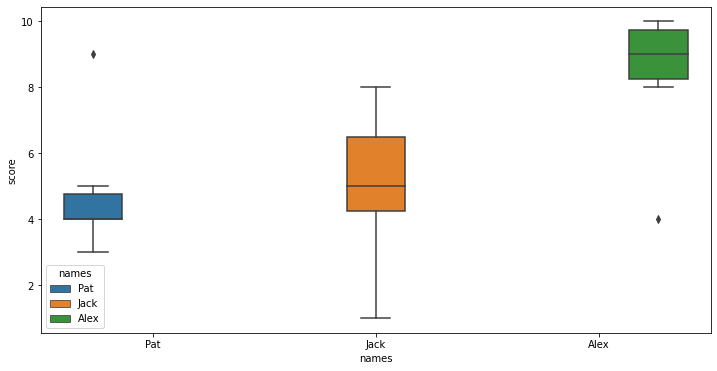

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='names',y='score',data=data,hue='names')

Reject H0 hypothesis if |mean difference between group(meandiff)| >= LSD

In [11]:
from statsmodels.stats.multicomp import MultiComparison

In [12]:
mulcompr = MultiComparison(data['score'],data['names'])
results = mulcompr.tukeyhsd(alpha=0.05)
print(results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Alex   Jack  -3.3333 0.0568 -6.7554 0.0887  False
  Alex    Pat     -3.5 0.0447  -6.922 -0.078   True
  Jack    Pat  -0.1667    0.9 -3.5887 3.2554  False
---------------------------------------------------


In reject column, 
<br>False ===> means of groups are equal 
<br>True  ===> means of groups are not equal

means are not equal for the Alex and Pat, also mean diff is less compare to other groups, so we will reject the Null H0

Conclusion- Alex is the best among all. 